# [항공기 결항 및 지연 요인 분석]

#### 학과 : 컴퓨터정보과   학번 : 202044050   이름 : 김예지

---

## 목차
[1. 분석 개요](#1-분석-개요)<br>
[2. 데이터 수집](#2-데이터-수집)<br>
[3. 데이터 전처리](#3-데이터-전처리)<br>
[4. 데이터 분석](#4-데이터-분석)<br>
[5. 데이터 시각화](#5-데이터-시각화)<br>
[6. 분석 결과](#6-분석-결과)<br>
[7. 항공편 지연/결항요인 분석](#7.-항공편-지연/결항요인-분석)<br>

---
chrome driver version : 106.0.5249.61<br>
*현재 사용중인 chrome 브라우저의 버전을 따름

### 공항 코드
|공항|코드|
|-|-|
|인천공항|RKSI|
|김포공항|RKSS|
|제주공항|RKPC|
|무안공항|RKJB|
|울산공항|RKPU|
|여수공항|RKJY|
|양양공항|RKNY|

### 날씨 요소 속성
|속성 번호|속성|
|:-:|:-:|
|0|풍향|
|1|풍속|
|2|시정|
|3|전운량|
|4|최저운고|
|5|기온|
|6|강수량|
|7|적설|
|8|신적설|

### 기상 용어
|용어|설명|단위|
|:-:|:-:|:-:|
|풍향|바람의 방향|10 deg|
|풍속|바람의 속도|KT|
|시정|눈에 보이는 최대 거리|10 m|
|전운량|구름이 하늘을 덮고 있는 정도|okta|
|최저운고|가장 낮은 구름의 높이|100 ft|
|기온|공기의 온도|℃|
|강수량|비, 눈, 우박 등이 지상에 내린 물의 총량|mm|
|적설|전부터 내려 녹지 않고 쌓여 있을 눈을 포함한 눈의 두께|0.1 cm|
|신적설|전에 내렸던 눈은 제거하고, 새롭게 쌓인 눈의 두께|0.1 cm|

데이터 수집 : 시간별 기상 데이터 크롤링

In [2]:
import pandas as pd
 
url1 = "https://amo.kma.go.kr/weather/stat/stat-hourly.do?stnCd="
airports = ['RKSI', 'RKSS', 'RKPC', 'RKJB', 'RKPU', 'RKJY', 'RKNY']
url2 = "&year="
years = range(2017, 2022)
url3 = "&month="
months = range(1, 13)
url4 = "&ele="
elements = range(9)
col = ['month', 'day', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13',
                                            '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24']

for a in airports:
    for e in elements:
        df = pd.DataFrame()
        for y in years:
            for m in months:
                # URL로 데이터 읽어오기
                df1 = pd.read_html(url1 + a + url2 + str(y) + url3 + str(m) + url4 + str(e))[0]
                # month 컬럼 추가(값 : 해당 달)
                df1['month'] = m
                # 컬럼 이름 변경 : '날짜' -> 'day'
                df1 = df1.rename(columns = {'시간날짜' : 'day'})
                # 컬럼 순서 재배열
                df1 = df1.reindex(columns = col)
                # 기존 데이터프레임에 병합
                df = pd.concat([df, df1])
            df.to_csv("C:/Data/weather/" + a + "/" + str(e) + "/" + str(y) + ".csv")
            print(f"file : C:/Data/weather/{a}/{str(e)}/{str(y)}.csv")

file : C:/Data/weather/RKSI/0/2017.csv
file : C:/Data/weather/RKSI/0/2018.csv
file : C:/Data/weather/RKSI/0/2019.csv
file : C:/Data/weather/RKSI/0/2020.csv
file : C:/Data/weather/RKSI/0/2021.csv
file : C:/Data/weather/RKSI/1/2017.csv
file : C:/Data/weather/RKSI/1/2018.csv
file : C:/Data/weather/RKSI/1/2019.csv
file : C:/Data/weather/RKSI/1/2020.csv
file : C:/Data/weather/RKSI/1/2021.csv
file : C:/Data/weather/RKSI/2/2017.csv
file : C:/Data/weather/RKSI/2/2018.csv
file : C:/Data/weather/RKSI/2/2019.csv
file : C:/Data/weather/RKSI/2/2020.csv
file : C:/Data/weather/RKSI/2/2021.csv
file : C:/Data/weather/RKSI/3/2017.csv
file : C:/Data/weather/RKSI/3/2018.csv
file : C:/Data/weather/RKSI/3/2019.csv
file : C:/Data/weather/RKSI/3/2020.csv
file : C:/Data/weather/RKSI/3/2021.csv
file : C:/Data/weather/RKSI/4/2017.csv
file : C:/Data/weather/RKSI/4/2018.csv
file : C:/Data/weather/RKSI/4/2019.csv
file : C:/Data/weather/RKSI/4/2020.csv
file : C:/Data/weather/RKSI/4/2021.csv
file : C:/Data/weather/RK

file : C:/Data/weather/RKPU/6/2018.csv
file : C:/Data/weather/RKPU/6/2019.csv
file : C:/Data/weather/RKPU/6/2020.csv
file : C:/Data/weather/RKPU/6/2021.csv
file : C:/Data/weather/RKPU/7/2017.csv
file : C:/Data/weather/RKPU/7/2018.csv
file : C:/Data/weather/RKPU/7/2019.csv
file : C:/Data/weather/RKPU/7/2020.csv
file : C:/Data/weather/RKPU/7/2021.csv
file : C:/Data/weather/RKPU/8/2017.csv
file : C:/Data/weather/RKPU/8/2018.csv
file : C:/Data/weather/RKPU/8/2019.csv
file : C:/Data/weather/RKPU/8/2020.csv
file : C:/Data/weather/RKPU/8/2021.csv
file : C:/Data/weather/RKJY/0/2017.csv
file : C:/Data/weather/RKJY/0/2018.csv
file : C:/Data/weather/RKJY/0/2019.csv
file : C:/Data/weather/RKJY/0/2020.csv
file : C:/Data/weather/RKJY/0/2021.csv
file : C:/Data/weather/RKJY/1/2017.csv
file : C:/Data/weather/RKJY/1/2018.csv
file : C:/Data/weather/RKJY/1/2019.csv
file : C:/Data/weather/RKJY/1/2020.csv
file : C:/Data/weather/RKJY/1/2021.csv
file : C:/Data/weather/RKJY/2/2017.csv
file : C:/Data/weather/RK

## 한국공항공사_지연통계

<데이터셋 다운로드> <br>
기간 : 2017년 1월 ~ 2021년 12월 <br>
구분 : 국내선<br>
인천공항 지연통계 출처 : [인천국제공항공사](https://www.airport.kr/co/ko/cpr/statisticOfDelay.do)<br>
국내공항(인천공항 제외) 지연통계 출처 : [한국공항공사](https://www.airport.co.kr/www/cms/frFlightStatsCon/delayStats.do?MENU_ID=1250#none)<br>
*한국공항공사에서는 인천공항의 지연통계를 제공하고 있지 않음

In [1]:
import pandas as pd

col = ['공항명', '출/도착', '운항', '기상', 'A/C접속', 'A/C정비', '여객처리', '복합원인', '기타', '계']
# 인천공항 
incheon = pd.read_csv("C:/Data/airline/지연통계_인천공항.csv")
print("[인천공항 원본 데이터]")
incheon

[인천공항 원본 데이터]


,기상,A/C접속,A/C정비,여객처리 및 승무원관련,복합원인,기타,운항(편),총 지연편수
0,1834,34174,3719,1130,619,23367,1432905,64843


In [2]:
# 열 이름 변경
incheon.columns = ['기상', 'A/C접속', 'A/C정비', '여객처리', '복합원인', '기타', '운항', '계']

# 공항명 열 추가
incheon['공항명'] = '인천'

# 열 순서 변경
incheon = incheon[['공항명', '운항', '기상', 'A/C접속', 'A/C정비', '여객처리', '복합원인', '기타', '계']]

print("[인천공항 전처리 데이터]")
incheon

[인천공항 전처리 데이터]


,공항명,운항,기상,A/C접속,A/C정비,여객처리,복합원인,기타,계
0,인천,1432905,1834,34174,3719,1130,619,23367,64843


In [6]:
# 국내공항(인천공항 제외)
airport = pd.read_csv("C:/Data/airline/지연통계_국내공항.csv")

print("[국내공항(인천 제외) 원본 데이터]")
airport.head(10)

[국내공항(인천 제외) 원본 데이터]


,Unnamed: 0,Unnamed: 1,Unnamed: 2,지연 통계,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,검색 기간,2017.01~2021.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,노선 구분,전체,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,공항명,출/도착,운항(편),기상,A/C접속,A/C장비,여객처리,복합원인,기타,계
5,김포,출발,339517,1633,29149,1037,885,936,2655,36295
6,김포,도착,339927,477,13552,355,113,67,290,14854
7,김포,계,679444,2110,42701,1392,998,1003,2945,51149
8,김해,출발,220121,611,10775,487,532,184,914,13503
9,김해,도착,220286,890,5989,304,74,33,953,8243


In [7]:
# 기간, 노선 구분을 나타내는 행 제거
airport = airport.drop([0, 1, 2, 3, 4])

# 열 이름 변경(공통되는 열 이름)
airport.columns = col

# 결측값 처리 
airport = airport.dropna(thresh = 9)

# 합계값만 필터링
mask = airport['출/도착'] == '계'
airport = airport[mask]

# 출/도착 열 삭제
airport = airport.drop(['출/도착'], axis = 1)

print("[국내공항(인천 제외) 전처리 데이터]")
airport.head()

[국내공항(인천 제외) 전처리 데이터]


,공항명,운항,기상,A/C접속,A/C정비,여객처리,복합원인,기타,계
7,김포,679444,2110,42701,1392,998,1003,2945,51149
10,김해,440407,1501,16764,791,606,217,1867,21746
13,제주,809463,3221,86033,1244,598,334,1739,93169
16,대구,107511,303,5578,89,44,7,307,6328
19,광주,67860,481,5258,74,38,79,168,6098


In [8]:
# 두 데이터프레임 병합(인천 + 국내공항(인천제외))
airports = pd.concat([incheon, airport])
airports = airports.reset_index()
airports.drop('index', axis = 1, inplace = True)
print("[국내공항 데이터]")
airports.head()

[국내공항 데이터]


,공항명,운항,기상,A/C접속,A/C정비,여객처리,복합원인,기타,계
0,인천,1432905,1834,34174,3719,1130,619,23367,64843
1,김포,679444,2110,42701,1392,998,1003,2945,51149
2,김해,440407,1501,16764,791,606,217,1867,21746
3,제주,809463,3221,86033,1244,598,334,1739,93169
4,대구,107511,303,5578,89,44,7,307,6328


In [9]:
# 데이터 타입 변경
airports = airports.astype({'운항' : 'int', '기상' : 'int', 'A/C접속' : 'int', 
                 'A/C정비' : 'int', '여객처리' : 'int', '복합원인' : 'int', '기타' : 'int', '계' : 'int'})

# 지연율 계산 : 백분위
airports['지연율'] = (airports.계 / airports.운항) * 100
airports.head()

,공항명,운항,기상,A/C접속,A/C정비,여객처리,복합원인,기타,계,지연율
0,인천,1432905,1834,34174,3719,1130,619,23367,64843,4.525283
1,김포,679444,2110,42701,1392,998,1003,2945,51149,7.528067
2,김해,440407,1501,16764,791,606,217,1867,21746,4.937705
3,제주,809463,3221,86033,1244,598,334,1739,93169,11.509976
4,대구,107511,303,5578,89,44,7,307,6328,5.885909


## 공항별 지연율 비교

In [10]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 폰트 설정
font_path = "C:/Windows/Fonts/malgunbd.ttf"
font = fm.FontProperties(fname = font_path).get_name()
plt.rc('font', family = font)
# 컬러맵 
cmap = plt.get_cmap("Set1")
color = cmap(range(7))

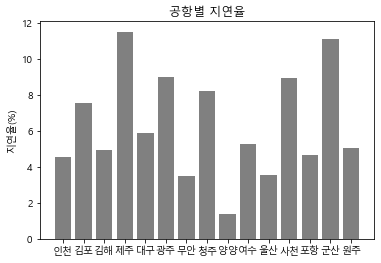

In [11]:
plt.bar(airports.공항명, airports.지연율, color = "grey")
plt.title("공항별 지연율")
plt.ylabel("지연율(%)")
plt.show()

## 지연 요인 분석

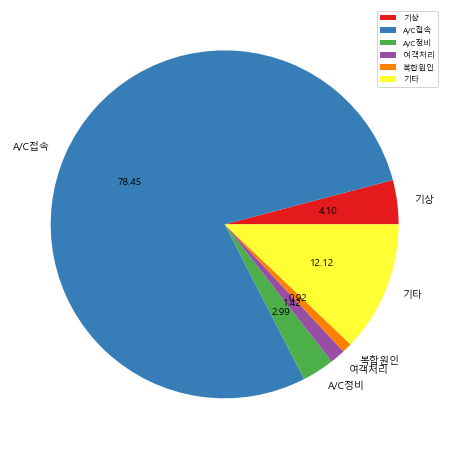

In [12]:
data = [airports['기상'].sum(), airports['A/C접속'].sum(), airports['A/C정비'].sum(), airports['여객처리'].sum(), airports['복합원인'].sum(), airports['기타'].sum()]
label = ['기상', 'A/C접속', 'A/C정비', '여객처리', '복합원인', '기타']

plt.figure(figsize = (8, 8))
plt.pie(data, labels = label, autopct = '%.2f',  colors = color)
plt.legend(loc = 'upper right', fontsize = 8)
plt.show()

항공편 지연 요인 분석 결과, 지연 요인 1위는 78.45%의 A/C 접속 문제, 2위는 4.10%의 기상 문제로 나타났으므로 '기상상황은 항공편 지연에 많은 영향을 미칠 것'이라는 가설은 기각되었다. 

## 한국공항공사_결항통계
<데이터셋 다운로드> <br>
기간 : 2017년 1월 ~ 2021년 12월 <br>
인천공항 결항통계 출처 : [인천국제공항공사](https://www.airport.kr/co/ko/cpr/statisticOfCanceled.do)<br>
국내공항(인천공항 제외) 결항통계 출처 : [한국공항공사](https://www.airport.co.kr/www/cms/frFlightStatsCon/canceledStats.do?MENU_ID=1250)<br>
*한국공항공사에서는 인천공항의 통계를 제공하고 있지 않음

In [1]:
import pandas as pd

col = ['공항명', '출/도착', '운항', '기상', 'A/C접속', 'A/C정비', '여객처리', '복합원인', '기타', '계']
# 인천공항 
incheon_cancel = pd.read_csv("C:/Data/airline/결항통계_인천공항.csv", encoding = 'cp949')
print("[인천공항 원본 데이터]")
incheon_cancel

[인천공항 원본 데이터]


,기상,A/C접속,A/C정비,여객처리 및 승무원관련,복합원인,기타,운항(편),총 지연편수
0,217,134,222,13,1,1662,1432905,2249


In [2]:
# 열 이름 변경
incheon_cancel.columns = ['기상', 'A/C접속', 'A/C정비', '여객처리', '복합원인', '기타', '운항', '계']

# 공항명 열 추가
incheon_cancel['공항명'] = '인천'

# 열 순서 변경
incheon_cancel = incheon_cancel[['공항명', '운항', '기상', 'A/C접속', 'A/C정비', '여객처리', '복합원인', '기타', '계']]

print("[인천공항 전처리 데이터]")
incheon_cancel

[인천공항 전처리 데이터]


,공항명,운항,기상,A/C접속,A/C정비,여객처리,복합원인,기타,계
0,인천,1432905,217,134,222,13,1,1662,2249


In [3]:
# 국내공항(인천공항 제외)
airport_cancel = pd.read_csv("C:/Data/airline/결항통계_국내공항.csv", encoding = 'cp949')

print("[국내공항(인천 제외) 원본 데이터]")
airport_cancel.head(10)

[국내공항(인천 제외) 원본 데이터]


,Unnamed: 0,Unnamed: 1,Unnamed: 2,결항 통계,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,검색 기간,2017.01~2021.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,노선 구분,전체,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,공항명,출/도착,운항(편),기상,A/C접속,A/C장비,여객처리,복합원인,기타,계
5,김포,출발,339517,2220,158,114,7,0,41,2540
6,김포,도착,339927,1990,534,104,10,0,220,2858
7,김포,계,679444,4210,692,218,17,0,261,5398
8,김해,출발,220121,1272,156,37,6,0,168,1639
9,김해,도착,220286,1440,121,59,3,1,178,1802


In [4]:
# 기간, 노선 구분을 나타내는 행 제거
airport_cancel = airport_cancel.drop([0, 1, 2, 3, 4])

# 열 이름 변경(공통되는 열 이름)
airport_cancel.columns = col

# 결측값 처리 
airport_cancel = airport_cancel.dropna(thresh = 9)

# 합계값만 필터링
mask = airport_cancel['출/도착'] == '계'
airport_cancel = airport_cancel[mask]

# 출/도착 열 삭제
airport_cancel = airport_cancel.drop(['출/도착'], axis = 1)

print("[국내공항(인천 제외) 전처리 데이터]")
airport_cancel

[국내공항(인천 제외) 전처리 데이터]


,공항명,운항,기상,A/C접속,A/C정비,여객처리,복합원인,기타,계
7,김포,679444,4210,692,218,17,0,261,5398
10,김해,440407,2712,277,96,9,1,346,3441
13,제주,809463,5028,636,198,5,1,353,6221
16,대구,107511,481,28,14,0,0,153,676
19,광주,67860,532,60,9,2,0,55,658
22,무안,13567,37,4,1,0,0,15,57
25,청주,81206,404,15,19,0,0,69,507
28,양양,5875,70,5,0,0,0,0,75
31,여수,29030,432,20,1,0,0,1,454
34,울산,31509,629,123,6,2,2,2,764


In [5]:
# 두 데이터프레임 병합(인천 + 국내공항(인천제외))
airports_cancel = pd.concat([incheon_cancel, airport_cancel])
airports_cancel = airports_cancel.reset_index()
airports_cancel.drop('index', axis = 1, inplace = True)
print("[국내공항 데이터]")
airports_cancel

[국내공항 데이터]


,공항명,운항,기상,A/C접속,A/C정비,여객처리,복합원인,기타,계
0,인천,1432905,217,134,222,13,1,1662,2249
1,김포,679444,4210,692,218,17,0,261,5398
2,김해,440407,2712,277,96,9,1,346,3441
3,제주,809463,5028,636,198,5,1,353,6221
4,대구,107511,481,28,14,0,0,153,676
5,광주,67860,532,60,9,2,0,55,658
6,무안,13567,37,4,1,0,0,15,57
7,청주,81206,404,15,19,0,0,69,507
8,양양,5875,70,5,0,0,0,0,75
9,여수,29030,432,20,1,0,0,1,454


In [6]:
# 데이터 타입 변경
airports_cancel = airports_cancel.astype({'운항' : 'int', '기상' : 'int', 'A/C접속' : 'int', 
                 'A/C정비' : 'int', '여객처리' : 'int', '복합원인' : 'int', '기타' : 'int', '계' : 'int'})

# 결항율 계산 : 백분위
airports_cancel['결항율'] = (airports_cancel.계 / airports_cancel.운항) * 100
airports_cancel

,공항명,운항,기상,A/C접속,A/C정비,여객처리,복합원인,기타,계,결항율
0,인천,1432905,217,134,222,13,1,1662,2249,0.156954
1,김포,679444,4210,692,218,17,0,261,5398,0.794473
2,김해,440407,2712,277,96,9,1,346,3441,0.781323
3,제주,809463,5028,636,198,5,1,353,6221,0.768534
4,대구,107511,481,28,14,0,0,153,676,0.628773
5,광주,67860,532,60,9,2,0,55,658,0.969643
6,무안,13567,37,4,1,0,0,15,57,0.420137
7,청주,81206,404,15,19,0,0,69,507,0.624338
8,양양,5875,70,5,0,0,0,0,75,1.276596
9,여수,29030,432,20,1,0,0,1,454,1.563899


## 공항별 결항율 분석

In [9]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 폰트 설정
font_path = "C:/Windows/Fonts/malgunbd.ttf"
font = fm.FontProperties(fname = font_path).get_name()
plt.rc('font', family = font)
# 컬러맵 
cmap = plt.get_cmap("Set1")
color = cmap(range(7))

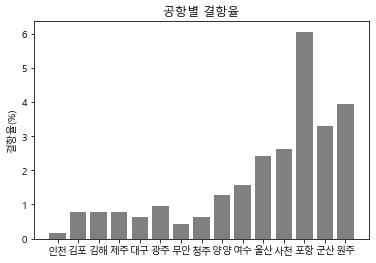

In [10]:
plt.bar(airports_cancel.공항명, airports_cancel.결항율, color = "grey")
plt.title("공항별 결항율")
plt.ylabel("결항율(%)")
plt.show()

## 결항 요인 분석

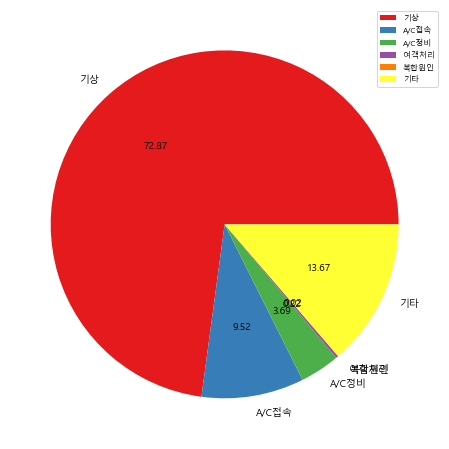

In [11]:
data = [airports_cancel['기상'].sum(), airports_cancel['A/C접속'].sum(), airports_cancel['A/C정비'].sum(), 
        airports_cancel['여객처리'].sum(), airports_cancel['복합원인'].sum(), airports_cancel['기타'].sum()]
label = ['기상', 'A/C접속', 'A/C정비', '여객처리', '복합원인', '기타']

plt.figure(figsize = (8, 8))
plt.pie(data, labels = label, autopct = '%.2f',  colors = color)
plt.legend(loc = 'upper right', fontsize = 8)
plt.show()

## 한국공항공사_기종별 통계
<데이터셋 다운로드> <br>
기간 : 2017년 1월 ~ 2021년 12월 <br>
국내공항(인천공항 제외) 통계 출처 : [한국공항공사](https://www.airport.co.kr/www/cms/frFlightStatsCon/kindStats.do?MENU_ID=1250#none)<br>
*인천공항공사에서는 기종별 통계를 제공하고 있지 않음

In [12]:
import pandas as pd
col = ['공항명', 'B737', 'B747', 'B767', 'B777', 'DC8', 'DC10', 'MD11', 'MD82', 'A300', 'A330', 'IL62', 'TU154', 'F100', '기타', '계']
aircraft = pd.read_csv("C:/Data/airline/기종통계.csv")
aircraft.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,기종별 통계,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,검색 기간,2017.01~2021.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,노선 구분,전체,운항 구분,전체,여객화물 구분,전체,출발/도착 구분,전체,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,공항명,B737,B747,B767,B777,DC8,DC10,MD11,MD82,A300,A330,IL62,TU154,F100,기타,계
6,김포,349552,3228,37910,35663,0,0,0,0,169742,29040,0,0,0,54309,679444
7,김해,213783,4,211,71,0,0,0,0,183298,15092,0,0,0,27948,440407
8,제주,487034,3103,36699,19186,0,0,0,235,209164,20585,0,0,0,33457,809463
9,대구,74093,0,0,1,0,0,0,10,32515,0,0,0,0,892,107511


In [13]:
# 기간, 노선 구분을 나타내는 행 제거
aircraft = aircraft.drop([0, 1, 2, 3, 4, 5])

# 열 이름 변경(공통되는 열 이름)
aircraft.columns = col

# 결측값 처리 
aircraft = aircraft.dropna(thresh = 9)

aircraft

,공항명,B737,B747,B767,B777,DC8,DC10,MD11,MD82,A300,A330,IL62,TU154,F100,기타,계
6,김포,349552,3228,37910,35663,0,0,0,0,169742,29040,0,0,0,54309,679444
7,김해,213783,4,211,71,0,0,0,0,183298,15092,0,0,0,27948,440407
8,제주,487034,3103,36699,19186,0,0,0,235,209164,20585,0,0,0,33457,809463
9,대구,74093,0,0,1,0,0,0,10,32515,0,0,0,0,892,107511
10,광주,40348,0,48,0,0,0,0,0,23337,0,0,0,0,4127,67860
11,무안,9438,0,0,4,0,0,0,0,4050,0,0,0,0,75,13567
12,청주,63409,0,42,503,0,0,0,44,14649,12,0,0,0,2547,81206
13,양양,5084,0,3,3,0,0,0,26,458,0,0,0,0,301,5875
14,여수,13183,0,0,0,0,0,0,0,14226,0,0,0,0,1621,29030
15,울산,8292,0,0,0,0,0,0,0,14295,0,0,0,0,8922,31509


In [14]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 폰트 설정
font_path = "C:/Windows/Fonts/malgunbd.ttf"
font = fm.FontProperties(fname = font_path).get_name()
plt.rc('font', family = font)
# 컬러맵 
cmap = plt.get_cmap("Set1")
color = cmap(range(7))

In [15]:
m = aircraft['공항명'] != '합계'
a = aircraft[m]
a

,공항명,B737,B747,B767,B777,DC8,DC10,MD11,MD82,A300,A330,IL62,TU154,F100,기타,계
6,김포,349552,3228,37910,35663,0,0,0,0,169742,29040,0,0,0,54309,679444
7,김해,213783,4,211,71,0,0,0,0,183298,15092,0,0,0,27948,440407
8,제주,487034,3103,36699,19186,0,0,0,235,209164,20585,0,0,0,33457,809463
9,대구,74093,0,0,1,0,0,0,10,32515,0,0,0,0,892,107511
10,광주,40348,0,48,0,0,0,0,0,23337,0,0,0,0,4127,67860
11,무안,9438,0,0,4,0,0,0,0,4050,0,0,0,0,75,13567
12,청주,63409,0,42,503,0,0,0,44,14649,12,0,0,0,2547,81206
13,양양,5084,0,3,3,0,0,0,26,458,0,0,0,0,301,5875
14,여수,13183,0,0,0,0,0,0,0,14226,0,0,0,0,1621,29030
15,울산,8292,0,0,0,0,0,0,0,14295,0,0,0,0,8922,31509


In [16]:
a = a.astype({'B737' : 'int', 'B747' : 'int', 'B767' : 'int', 'B777' : 'int', 'DC8' : 'int', 'DC10' : 'int', 'MD11' : 'int'
              , 'MD82' : 'int', 'A300' : 'int', 'A330' : 'int', 'IL62' : 'int', 'TU154' : 'int', 'F100' : 'int', '기타' : 'int'})

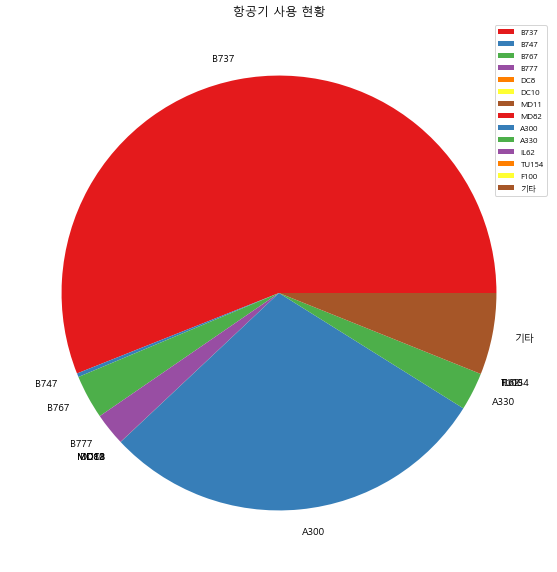

In [17]:
data = [a.B737.sum(), a.B747.sum(), a.B767.sum(), a.B777.sum(), a.DC8.sum(), a.DC10.sum(), 
        a.MD11.sum(), a.MD82.sum(), a.A300.sum(), a.A330.sum(), a.IL62.sum(), a.TU154.sum(),
       a.F100.sum(), a.기타.sum()]
label = ['B737', 'B747', 'B767', 'B777', 'DC8', 'DC10', 'MD11', 'MD82', 'A300', 'A330', 'IL62', 'TU154', 'F100', '기타']

plt.figure(figsize = (10, 10))
plt.pie(data, labels = label, colors = color)
plt.legend(loc = 'upper right', fontsize = 8)
plt.title('항공기 사용 현황')
plt.show()

## 항공사별 지연
<데이터><br>
출처 : [국토교통부](https://stat.molit.go.kr/portal/cate/statView.do?hRsId=523&hFormId=4630&hSelectId=4630&hPoint=00&hAppr=1&hDivEng=&oFileName=&rFileName=&midpath=&month_yn=N&sFormId=4630&sStart=2017&sEnd=2021&sStyleNum=1003&EXPORT=)<br>
기간 : 2017년 1월 ~ 2022년 12월

In [18]:
import pandas as pd

airline = pd.read_csv("C:/Data/airline/항공종사자현황.csv")
airline.head(10)

,년(Annual),항공분류,구분,LEVEL1,LEVEL2,값,증감,증감율,구성비,누계,누계구성비
0,2017,대한항공,내국인,조종사,운송용,1356.0,1356.0,1356.0,0,0,0
1,2017,대한항공,내국인,조종사,사업용,932.0,932.0,932.0,0,0,0
2,2017,대한항공,내국인,조종사,계,2288.0,2288.0,2288.0,0,0,0
3,2017,대한항공,내국인,항공정비사,항공정비사,2706.0,2706.0,2706.0,0,0,0
4,2017,대한항공,내국인,운항관리사,운항관리사,170.0,170.0,170.0,0,0,0
5,2017,대한항공,내국인,객실승무원,객실승무원,6341.0,6341.0,6341.0,0,0,0
6,2017,대한항공,내국인,계,계,11505.0,11505.0,11505.0,0,0,0
7,2017,대한항공,외국인,조종사,운송용,397.0,397.0,397.0,0,0,0
8,2017,대한항공,외국인,조종사,사업용,14.0,14.0,14.0,0,0,0
9,2017,대한항공,외국인,조종사,계,411.0,411.0,411.0,0,0,0


In [19]:
airline.drop(['증감', '증감율','구성비', '누계', '누계구성비', 'LEVEL2'], axis = 1, inplace = True)
airline.head()


,년(Annual),항공분류,구분,LEVEL1,값
0,2017,대한항공,내국인,조종사,1356.0
1,2017,대한항공,내국인,조종사,932.0
2,2017,대한항공,내국인,조종사,2288.0
3,2017,대한항공,내국인,항공정비사,2706.0
4,2017,대한항공,내국인,운항관리사,170.0


In [20]:
airline = airline.dropna(thresh = 4)
airline

,년(Annual),항공분류,구분,LEVEL1,값
0,2017,대한항공,내국인,조종사,1356.0
1,2017,대한항공,내국인,조종사,932.0
2,2017,대한항공,내국인,조종사,2288.0
3,2017,대한항공,내국인,항공정비사,2706.0
4,2017,대한항공,내국인,운항관리사,170.0
...,...,...,...,...,...
1099,2021,총계,소계,조종사,6355.0
1100,2021,총계,소계,항공정비사,5480.0
1101,2021,총계,소계,운항관리사,494.0
1102,2021,총계,소계,객실승무원,13658.0


In [21]:
airline_mask = (airline['LEVEL1'] == '항공정비사')&(airline['구분'] == '소계')
airline = airline[airline_mask]
airline.head()

,년(Annual),항공분류,구분,LEVEL1,값
15,2017,대한항공,소계,항공정비사,2706.0
35,2017,아시아나항공,소계,항공정비사,1441.0
52,2017,제주항공,소계,항공정비사,332.0
73,2017,진에어,소계,항공정비사,133.0
90,2017,에어부산,소계,항공정비사,116.0


In [22]:
# 2021 항공사별 항공정비사 수
airline_2021_mask = (airline['년(Annual)'] == 2021) & (airline['항공분류'] != '총계')
airline_2021 = airline[airline_2021_mask]
airline_2021

,년(Annual),항공분류,구분,LEVEL1,값
848,2021,대한항공,소계,항공정비사,2804.0
869,2021,아시아나항공,소계,항공정비사,1277.0
890,2021,제주항공,소계,항공정비사,474.0
911,2021,진에어,소계,항공정비사,151.0
932,2021,에어부산,소계,항공정비사,185.0
953,2021,이스타항공,소계,항공정비사,132.0
974,2021,티웨이,소계,항공정비사,282.0
995,2021,에어인천,소계,항공정비사,38.0
1016,2021,에어서울,소계,항공정비사,25.0
1037,2021,플라이강원,소계,항공정비사,36.0


In [23]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 폰트 설정
font_path = "C:/Windows/Fonts/malgunbd.ttf"
font = fm.FontProperties(fname = font_path).get_name()
plt.rc('font', family = font)
# 컬러맵 
cmap = plt.get_cmap("Set1")
color = cmap(range(7))

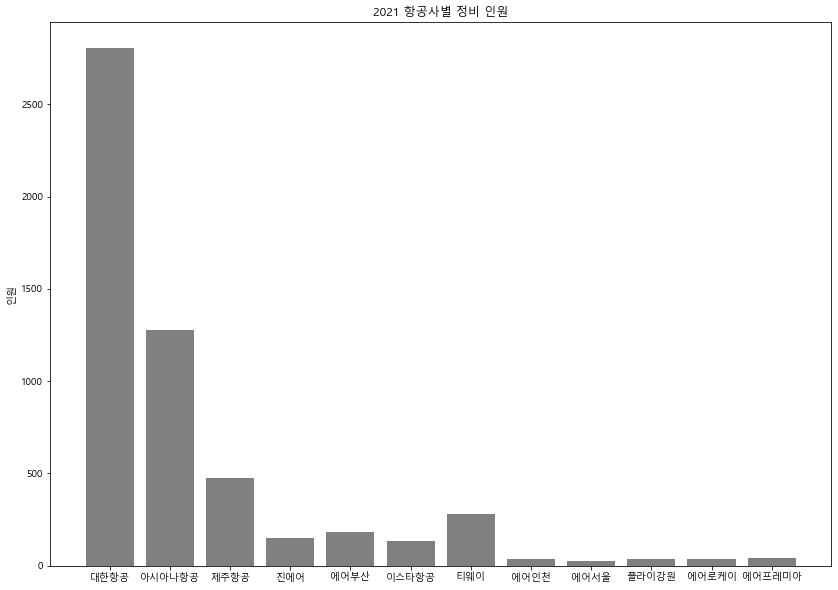

In [24]:
plt.figure(figsize = (14, 10))
plt.bar(airline_2021.항공분류, airline_2021.값, color = "grey")
plt.title("2021 항공사별 정비 인원")
plt.ylabel("인원")
plt.show()